EXAMEN

In [105]:
from lxml import html
import requests
import codecs
import Levenshtein
import pandas as pd
import numpy as np

Ariketa 1

In [106]:
page = requests.get('https://dreguera.github.io/')
tree = html.fromstring(page.content)

In [107]:
b = tree.xpath("//div[@id='content']/text()")

In [108]:
b

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?',
 'Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN',
 'MeanShift para clustering por densidad habeis visto? Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers',
 'Si, la verdad es que da buenos resultados pero cuando si puedes hacer ajustes manuales de otros parÃ¡metros, OPTICS y DBSCAN son mÃ¡s Ã³ptimos',
 'El tema del clutering por densidad me parece super interesante pero no se si tendrÃ\xada aplicabilidad en el Reto 7',
 'Creo que podrÃ\xadamos traer a una empresa para que les hablara de HDBSCAN',
 'Guay! me parece super interesante y puede ser super enriquecedor',
 'Perfecto']

In [109]:
import string
import nltk
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize, sent_tokenize

from lxml import html
import requests
import codecs

import gensim


a)

In [110]:
file_docs=[]
file_docs2=[]
tokens = sent_tokenize(b[0]) #tokenize es separar por frases
for line in tokens:
    file_docs.append(line) #separa las frases en lineas
    
tokens = sent_tokenize(b[2])
for line in tokens:
    file_docs2.append(line)

In [111]:
file_docs

['He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?']

In [112]:
file_docs2

['MeanShift para clustering por densidad habeis visto?',
 'Yo suelo utilizar para datos numÃ©ricos y me da muy buenos resultados para descartar outliers']

In [113]:

gen_docs = [[w.lower() for w in word_tokenize(text)]  
            for text in file_docs]

gen_docs2 = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs2]

dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary.token2id)

corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

tf_idf = gensim.models.TfidfModel(corpus)

sims = gensim.similarities.Similarity('a',tf_idf[corpus],
                                        num_features=len(dictionary))

for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)
query_doc_tf_idf = tf_idf[query_doc_bow]

import numpy as np

sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))

{',': 0, '?': 1, 'algoritmos': 2, 'aprendizaje': 3, 'bastante': 4, 'bien': 5, 'clase': 6, 'clustering': 7, 'corrigiendo': 8, 'dado': 9, 'data': 10, 'de': 11, 'en': 12, 'estado': 13, 'han': 14, 'has': 15, 'he': 16, 'la': 17, 'los': 18, 'no': 19, 'parte': 20, 'realizado': 21, 'science': 22, 'supervisado': 23, 'trabajos': 24, 'y': 25, 'â¿quã©': 26}


In [114]:
print(f'La similitud entre estos mensjes es de este %: {float(sum_of_sims / len(file_docs)) * 100}')

La similitud entre estos mensjes es de este %: 0.0


b)

In [115]:
file_docs=[]
file_docs2=[]
tokens = sent_tokenize(b[1]) #tokenize es separar por frases
for line in tokens:
    file_docs.append(line) #separa las frases en lineas
    
tokens = sent_tokenize(b[3])
for line in tokens:
    file_docs2.append(line)

In [116]:

gen_docs = [[w.lower() for w in word_tokenize(text)]  
            for text in file_docs]

gen_docs2 = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs2]

dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary.token2id)

corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

tf_idf = gensim.models.TfidfModel(corpus)

sims = gensim.similarities.Similarity('a',tf_idf[corpus],
                                        num_features=len(dictionary))

for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)
query_doc_tf_idf = tf_idf[query_doc_bow]

import numpy as np

sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))

{',': 0, '.': 1, 'centrado': 2, 'clustering': 3, 'dani': 4, 'de': 5, 'densidad': 6, 'el': 7, 'en': 8, 'he': 9, 'hola': 10, 'la': 11, 'me': 12, 'no': 13, 'parte': 14, 'por': 15, 'sobre': 16, 'supervisado': 17, 'todo': 18, 'dbscan': 19, 'hdscan': 20, 'hemos': 21, 'optics': 22, 'visto': 23, 'y': 24}


In [117]:
print(f'La similitud entre estos mensjes es de este %: {float(sum_of_sims / len(file_docs)) * 100}')

La similitud entre estos mensjes es de este %: 37.14512884616852


c)

In [118]:
file_docs=[]
file_docs2=[]
tokens = sent_tokenize(b[1]) #tokenize es separar por frases
for line in tokens:
    file_docs.append(line) #separa las frases en lineas
    
tokens = sent_tokenize(b[4])
for line in tokens:
    file_docs2.append(line)

In [119]:

gen_docs = [[w.lower() for w in word_tokenize(text)]  
            for text in file_docs]

gen_docs2 = [[w.lower() for w in word_tokenize(text)] 
            for text in file_docs2]

dictionary = gensim.corpora.Dictionary(gen_docs)
print(dictionary.token2id)

corpus = [dictionary.doc2bow(gen_doc) for gen_doc in gen_docs]

tf_idf = gensim.models.TfidfModel(corpus)

sims = gensim.similarities.Similarity('a',tf_idf[corpus],
                                        num_features=len(dictionary))

for line in file_docs2:
    query_doc = [w.lower() for w in word_tokenize(line)]
    query_doc_bow = dictionary.doc2bow(query_doc)
query_doc_tf_idf = tf_idf[query_doc_bow]

import numpy as np

sum_of_sims =(np.sum(sims[query_doc_tf_idf], dtype=np.float32))

{',': 0, '.': 1, 'centrado': 2, 'clustering': 3, 'dani': 4, 'de': 5, 'densidad': 6, 'el': 7, 'en': 8, 'he': 9, 'hola': 10, 'la': 11, 'me': 12, 'no': 13, 'parte': 14, 'por': 15, 'sobre': 16, 'supervisado': 17, 'todo': 18, 'dbscan': 19, 'hdscan': 20, 'hemos': 21, 'optics': 22, 'visto': 23, 'y': 24}


In [120]:
print(f'La similitud entre estos mensjes es de este %: {float(sum_of_sims / len(file_docs)) * 100}')

La similitud entre estos mensjes es de este %: 29.09572124481201


d) 

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [125]:
vectorizer = CountVectorizer().fit_transform(b) #fit transform pasa a 0,1...
vectors = vectorizer.toarray() #calcula la matriz de vectores
csim=cosine_similarity(vectors)

In [126]:
csim

array([[1.        , 0.40567404, 0.03194383, 0.16574839, 0.07377111,
        0.13093073, 0.        , 0.        ],
       [0.40567404, 1.        , 0.18898224, 0.15689291, 0.34914862,
        0.05163978, 0.06030227, 0.        ],
       [0.03194383, 0.18898224, 1.        , 0.1111874 , 0.12371791,
        0.14638501, 0.05698029, 0.        ],
       [0.16574839, 0.15689291, 0.1111874 , 1.        , 0.12838815,
        0.15191091, 0.        , 0.        ],
       [0.07377111, 0.34914862, 0.12371791, 0.12838815, 1.        ,
        0.        , 0.32897585, 0.        ],
       [0.13093073, 0.05163978, 0.14638501, 0.15191091, 0.        ,
        1.        , 0.        , 0.        ],
       [0.        , 0.06030227, 0.05698029, 0.        , 0.32897585,
        0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        ]])

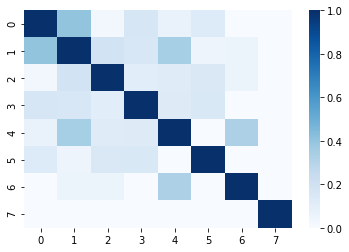

In [129]:
import seaborn as sns
ax = sns.heatmap(csim, cmap='Blues')

Se puede observar que la primera frase (posicion 0) y la segunda frase (posición 1) son los mensajes que mas se asemejan 

In [130]:
b[0], b[1]

('He estado corrigiendo los trabajos de Data Science y la parte de aprendizaje no supervisado la han realizado bastante bien, Â¿QuÃ© algoritmos de clustering has dado en clase?',
 'Hola Dani, en la parte de no supervisado me he centrado sobre todo en el clustering por densidad. Hemos visto Optics, DBSCAN y HDSCAN')